In [3]:
import mdm

In [4]:
model_name = 'gb_v2'

In [5]:
raw_data = mdm.datas.get("../data/", "dataset.csv")
data = mdm.datas.transform(raw_data)
X_train, y_train, X_dev, y_dev, X_test, y_test = mdm.datas.split(data, 'activity',  pct_test=0.2)

2021-05-14 06:09:42,045 | INFO : log volume
2021-05-14 06:09:42,052 | INFO : log density
2021-05-14 06:09:42,055 | INFO : log weight
2021-05-14 06:09:42,060 | INFO : train size : 720
2021-05-14 06:09:42,061 | INFO : dev size : 90
2021-05-14 06:09:42,062 | INFO : test size : 90


In [6]:
acc, model = mdm.models.train(X_train, y_train, X_dev.append(X_test), y_dev.append(y_test))

2021-05-14 06:09:43,070 | INFO : accuracy : 0.8333333333333334


In [7]:
val = mdm.models.evaluate(model, X_dev.append(X_test), y_dev.append(y_test))

2021-05-14 06:09:43,083 | INFO : accuracy : 0.8333333333333334


In [8]:
mdm.models.save(model, model_name)

2021-05-14 06:09:43,106 | INFO : saved to : /Users/philippefraisse/Documents/WORK/test/mdm/mdm/../models/gb_v2


In [9]:
model = mdm.models.load(model_name)

2021-05-14 06:09:43,189 | INFO : loaded from : /Users/philippefraisse/Documents/WORK/test/mdm/mdm/../models/gb_v2/gb_v2


In [10]:
preds = mdm.models.predict(model, X_dev.append(X_test))

In [11]:
test_set = X_dev.append(X_test)
test_set['preds'] = preds
test_set['activity'] = y_dev.append(y_test)

2021-05-14 06:09:45,508 | INFO : saving to : /Users/philippefraisse/Documents/WORK/test/mdm/mdm/../models/gb_v2/confusion_matrix.png


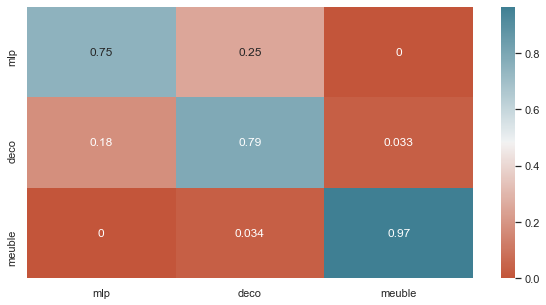

In [12]:
labels = ['mlp', 'deco', 'meuble']
mdm.visualisations.confusion_matrix(test_set.activity, test_set.preds, labels, model_name=model_name)

2021-05-14 06:09:46,713 | INFO : saving to : /Users/philippefraisse/Documents/WORK/test/mdm/mdm/../models/gb_v2/feature_importance.png


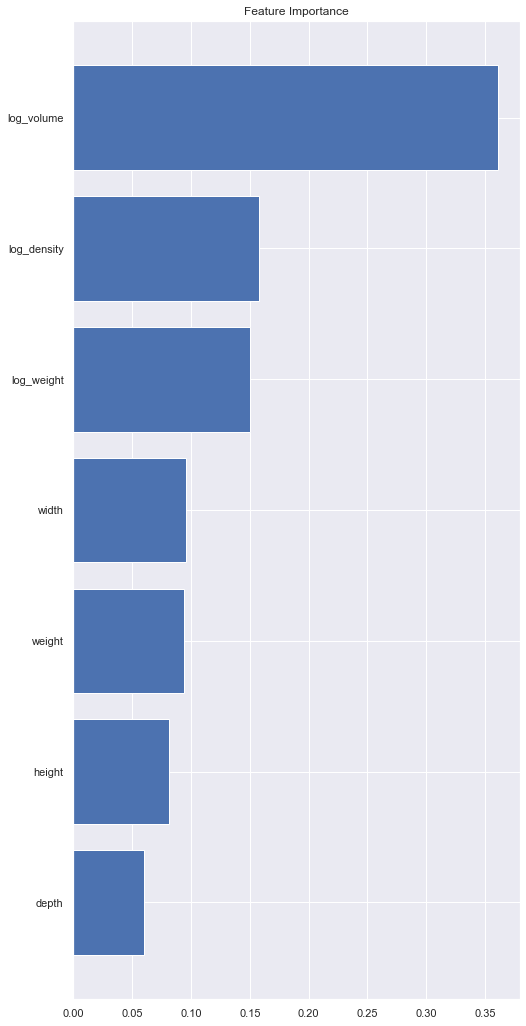

In [13]:
feats = X_train.columns
mdm.visualisations.feature_importance(model.feature_importances_, feats, model_name=model_name)